Mean Absolute Error: 42.79409467959994
Root Mean Squared Error: 53.853445836765914
R² Score: 0.4526027629719197

Model coefficients:
age: 37.9040
sex: -241.9644
bmi: 542.4288
bp: 347.7038
s1: -931.4888
s2: 518.0623
s3: 163.4200
s4: 275.3179
s5: 736.1989
s6: 48.6707
Intercept: 151.34560453985995


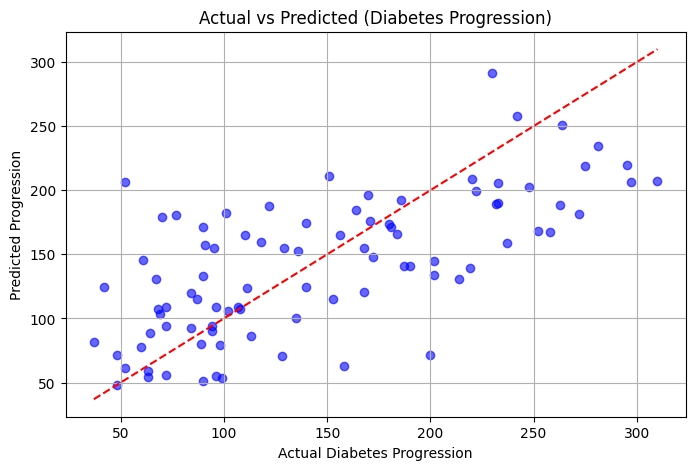

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the built-in diabetes dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create a linear regression model and fit it
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print evaluation metrics
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

# Show model coefficients
print("\nModel coefficients:")
for name, coef in zip(diabetes.feature_names, model.coef_):
    print(f"{name}: {coef:.4f}")
print("Intercept:", model.intercept_)

# Plot Actual vs Predicted values
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Diabetes Progression")
plt.ylabel("Predicted Progression")
plt.title("Actual vs Predicted (Diabetes Progression)")
plt.grid(True)
plt.show()
